
# k-NN & Decision Trees Classification

Machine learning classifiers can be broadly categorized into linear and non-linear models. Non-linear classifiers are particularly useful when the relationship between features and target classes is complex or not easily separable by a straight line. Two popular non-linear classifiers are:

-   **k-Nearest Neighbors (k-NN)**
-   **Decision Trees**

## k-Nearest Neighbors (k-NN)

k-Nearest Neighbors is a non-parametric, **instance-based** learning algorithm which does not explicitly learn a model but stores the training instances. For a new observation $\hat{x}$, the algorithm:

1.  Computes the distance between $\hat{x}$ and every point in the training set (commonly the Euclidean distance, but can also use Manhattan or Minkowski distances).
2.  Selects the $k$ closest neighbors.
3.  Predicts the class by majority vote among those neighbors.

The decision boundary is implicitly defined by the $k$ nearest points; therefore the model can capture highly non-linear class boundaries without explicit training.

### Mathematical formulation

Given a training set $\{{(x_i, y_i)}\}_{i = 1}^{n}$ where $y_i \in \{1, \dots,C\}$, the prediction for a query point $\hat{x}$ is $$\hat{y} = \text{mode}\left(\{y_j | x_j \in N_k(\hat{x})\}\right),$$

where $N_k(\hat{x})$ denotes the set of $k$ training points closest to $\hat{x}$.

-   **Choosing $k$**:
    -   Small $k$ can lead to noise sensitivity (overfitting).
    -   Large $k$ can smooth out class boundaries (underfitting).
    -   Cross-validation is often used to select the optimal $k$.
-   **Advantages**:
    -   Simple and intuitive.
    -   No training phase; all computation happens at prediction time.
    -   Naturally handles multi-class classification.
-   **Disadvantages**:
    -   Computationally expensive at prediction time, especially with large datasets.
    -   Sensitive to irrelevant features and feature scaling.
    -   Requires a good choice of distance metric.

## Decision Trees

A Decision Tree recursively partitions the feature space into axis-aligned regions and assigns a class label to each region. It consists of nodes (features), branches (decisions), and leaves (outcomes). At each node the algorithm chooses the split that maximizes a purity metric such as **information gain** or **Gini impurity**. The tree is built by recursively splitting the dataset into subsets until a stopping criterion is met (e.g., maximum depth, minimum samples per leaf).

By hierarchically splitting the space, a tree can approximate complex decision boundaries while remaining interpretable-each internal node corresponds to a human-readable rule.

### Information gain

For a node containing a sample set $S$, the entropy is

$$H(S)= -\sum_{c = 1}^{C} p_c \log_2 p_c,$$

with $p_c$ the proportion of class $c$. A split of $S$ into subsets $S_L, S_R$ yields information gain

$$IG = H(S) - \frac{|S_L|}{|S|} H(S_L) - \frac{|S_R|}{|S|} H(S_R).$$

The algorithm selects the split with the highest **IG** (or lowest Gini).

-   **Advantages**:
    -   Easy to interpret and visualize.
    -   Handles both numerical and categorical data.
    -   Non-parametric: does not assume any specific distribution of the data.
-   **Disadvantages**:
    -   Prone to overfitting, especially with deep trees.
    -   Sensitive to small changes in the data (can lead to different trees).
    -   Can create biased trees if some classes dominate.
-   **Pruning**: Techniques like cost-complexity pruning can be applied to reduce overfitting by removing branches that have little importance.

## Practical Demonstration

Below we illustrate both algorithms on the classic **Iris** data set.

In [1]:
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd

# Load data and keep only two features for 2-D visualisation
iris = datasets.load_iris()
X = iris.data[:, 2:4]
y = iris.target
feature_names = iris.feature_names[2:4]
class_names = iris.target_names

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

-   Preprocessing the data and training the classifiers

In [2]:
# Create a Pipeline for k-NN containing standardisation and classifier
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

# Fit k-NN
knn_pipeline.fit(X_train, y_train)

# Predict and evaluate k-NN
y_pred_knn = knn_pipeline.predict(X_test)
print("k-NN accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn, target_names=class_names))

k-NN accuracy: 0.9111111111111111
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



In [3]:
# Create a Pipeline for DecisionTree
dt_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Non-necessary for DT, but included for consistency
    ('dt', DecisionTreeClassifier(max_depth=3, random_state=42))
])

# Fit Decision Tree
dt_pipeline.fit(X_train, y_train)

# Predict and evaluate Decision Tree
y_pred_dt = dt_pipeline.predict(X_test)
print("Decision Tree accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt, target_names=class_names))

Decision Tree accuracy: 0.9333333333333333
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



-   Visualising the decision boundaries

In [4]:
from sklearn.inspection import DecisionBoundaryDisplay

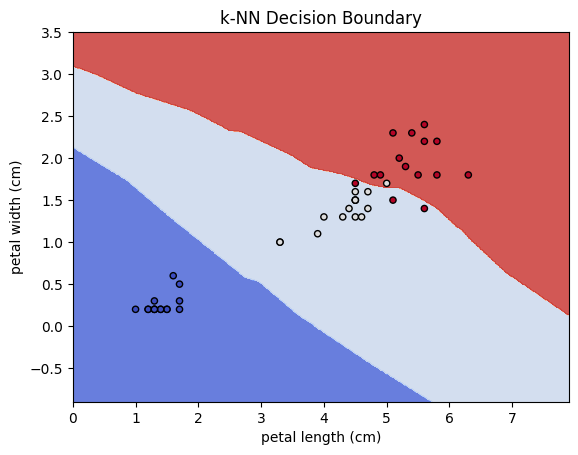

In [5]:
display = DecisionBoundaryDisplay.from_estimator(
    knn_pipeline, X, response_method='predict',
    cmap=plt.cm.coolwarm, alpha=0.85,
    xlabel=feature_names[0], ylabel=feature_names[1],
    grid_resolution=500)
plt.title("k-NN Decision Boundary")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', s=20, cmap=plt.cm.coolwarm)
plt.show()

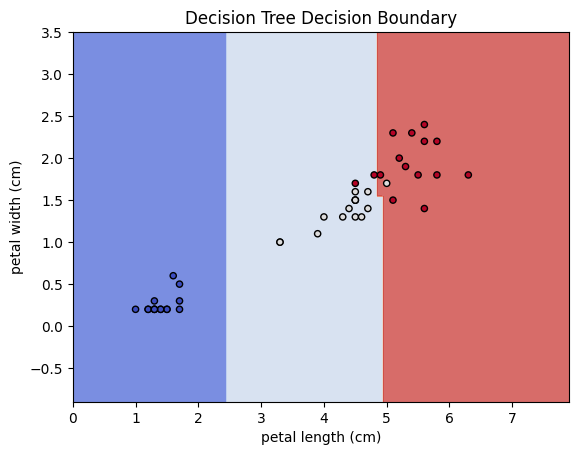

In [6]:
display = DecisionBoundaryDisplay.from_estimator(
    dt_pipeline, X, response_method='predict',
    cmap=plt.cm.coolwarm, alpha=0.75,
    xlabel=feature_names[0], ylabel=feature_names[1],
    grid_resolution=500)
plt.title("Decision Tree Decision Boundary")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', s=20, cmap=plt.cm.coolwarm)
plt.show()

-   Visualising the Decision Tree structure

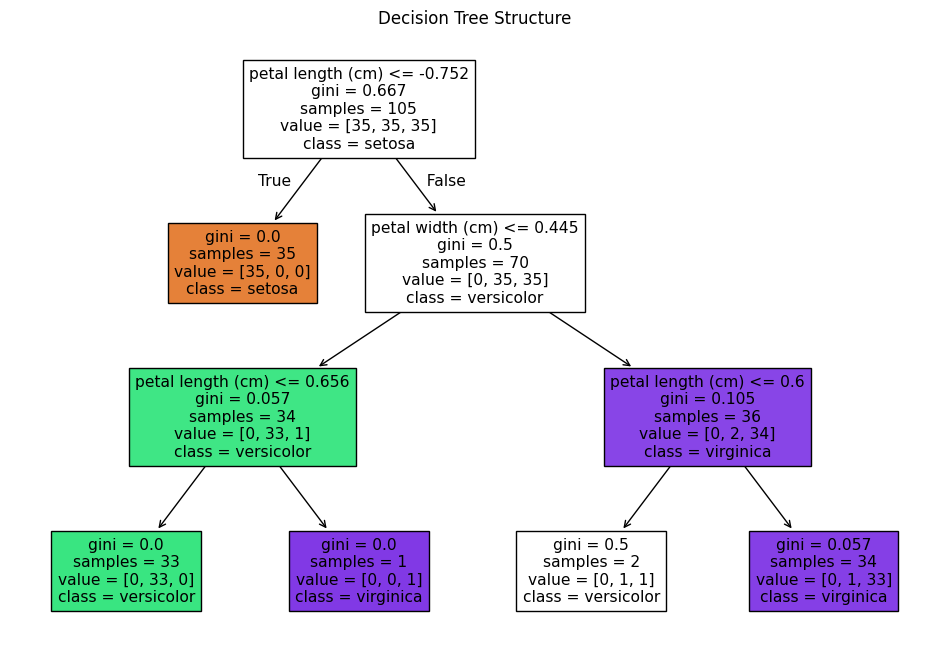

In [7]:
plt.figure(figsize=(12, 8))
plot_tree(dt_pipeline.named_steps['dt'], filled=True, feature_names=feature_names, class_names=class_names)
plt.title("Decision Tree Structure")
plt.show()

## Hands-on Exercises

-   **k-NN hyper-parameters**
    -   Re-run the demo varying $k$ from 1 to 15.

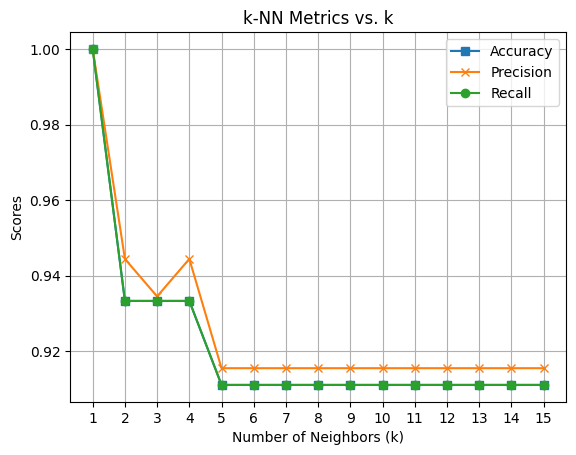

In [8]:
from sklearn.metrics import precision_score, recall_score
accuracies = []
precisions = []
recalls = []
for k in range(1, 16):
    knn_pipeline.set_params(knn__n_neighbors=k)
    knn_pipeline.fit(X_train, y_train)
    y_pred = knn_pipeline.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred, average='weighted'))
    recalls.append(recall_score(y_test, y_pred, average='weighted'))
plt.plot(range(1, 16), accuracies, marker='s', label='Accuracy')
plt.plot(range(1, 16), precisions, marker='x', label='Precision')
plt.plot(range(1, 16), recalls, marker='o', label='Recall')
plt.title("k-NN Metrics vs. k")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Scores")
plt.xticks(range(1, 16))
plt.legend()
plt.grid()
plt.show()

-   Try Manhattan distance (`metric='manhattan'`) and observe how the boundary changes.

k-NN (Manhattan) accuracy: 0.9111111111111111


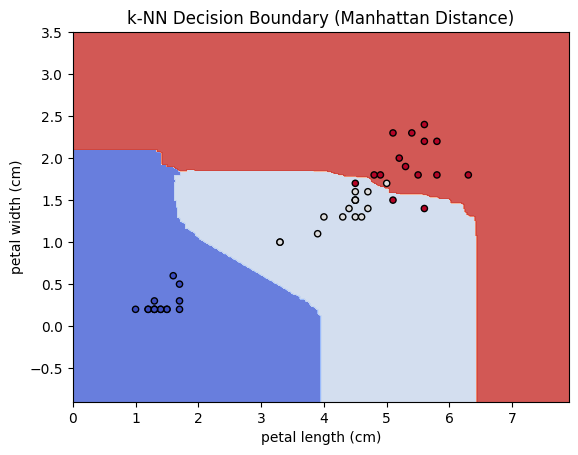

In [9]:
knn_pipeline.set_params(knn__metric='manhattan')
knn_pipeline.fit(X_train, y_train)
y_pred = knn_pipeline.predict(X_test)
print("k-NN (Manhattan) accuracy:", accuracy_score(y_test, y_pred))
display = DecisionBoundaryDisplay.from_estimator(
    knn_pipeline, X, response_method='predict',
    cmap=plt.cm.coolwarm, alpha=0.85,
    xlabel=feature_names[0], ylabel=feature_names[1],
    grid_resolution=500)
plt.title("k-NN Decision Boundary (Manhattan Distance)")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', s=20, cmap=plt.cm.coolwarm)
plt.show()

-   **Decision Tree pruning**
    -   Grow an unpruned tree (`max_depth=None`) and visualise it with `plot_tree`.

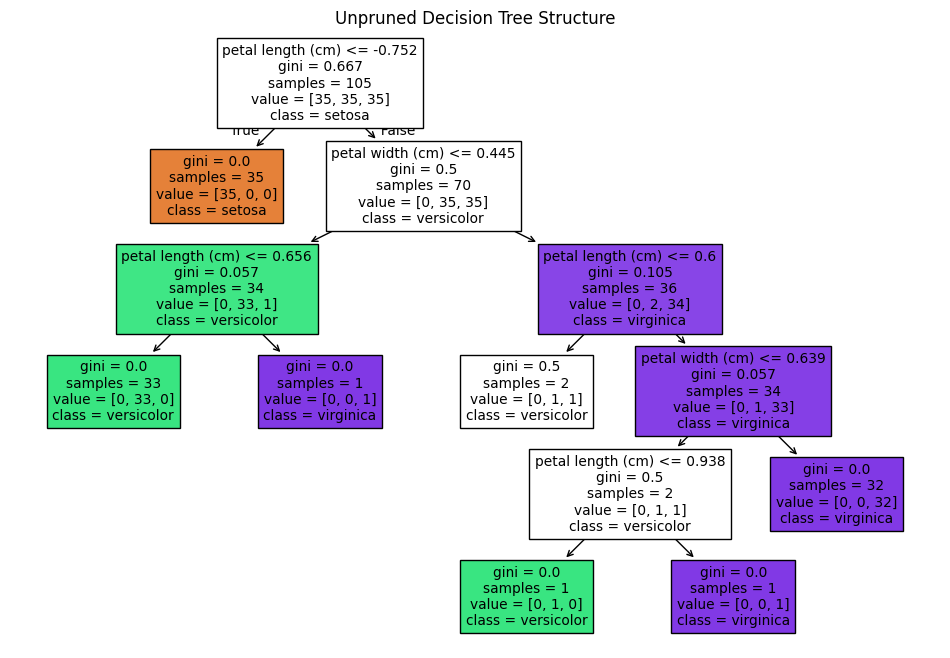

In [10]:
dt_pipeline.set_params(dt__max_depth=None)
dt_pipeline.fit(X_train, y_train)
plt.figure(figsize=(12, 8))
plot_tree(dt_pipeline.named_steps['dt'], filled=True, feature_names=feature_names, class_names=class_names)
plt.title("Unpruned Decision Tree Structure")
plt.show()

-   What, in your opinion, is the disadvantage of an unpruned tree?

-   **Multiclass confusion matrix**
    -   Implement and plot confusion matrices for both classifiers on the full four-feature Iris data set.
        -   Which mis-classifications are most common and why?

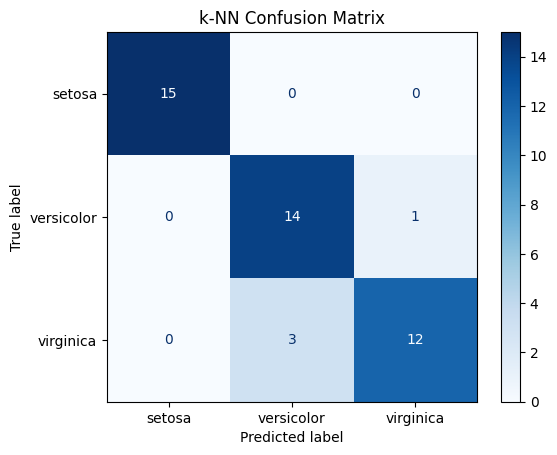

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion matrix for k-NN
disp_knn = ConfusionMatrixDisplay.from_estimator(
    knn_pipeline, X_test, y_test, display_labels=class_names, cmap='Blues')
plt.title("k-NN Confusion Matrix")
plt.show()

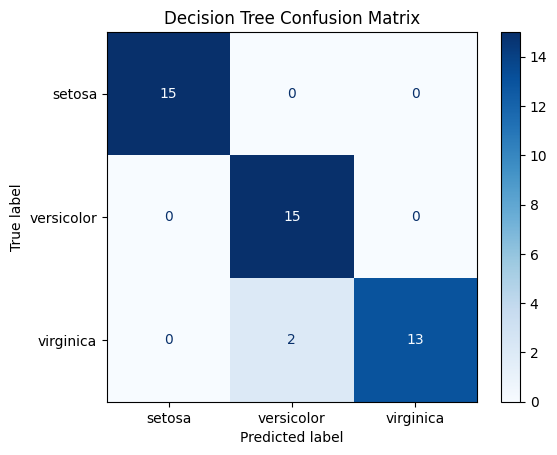

In [12]:
# Confusion matrix for Decision Tree
disp_dt = ConfusionMatrixDisplay.from_estimator(
    dt_pipeline, X_test, y_test, display_labels=class_names, cmap=plt.cm.Blues)
plt.title("Decision Tree Confusion Matrix")
plt.show()

-   **Real-world data**
    -   Load the **Wine** data set (`sklearn.datasets.load_wine`).

In [13]:
from sklearn.datasets import load_wine
wine = datasets.load_wine()
X_wine = wine.data
y_wine = wine.target

# Train-test split
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(
    X_wine, y_wine, test_size=0.3, random_state=42, stratify=y_wine)

-   Explore the data set and visualise the features.

In [14]:
wine_df = pd.DataFrame(X_wine, columns=wine.feature_names)
wine_df['target'] = y_wine
print(wine_df.describe())
print(wine_df['target'].value_counts())

          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.9

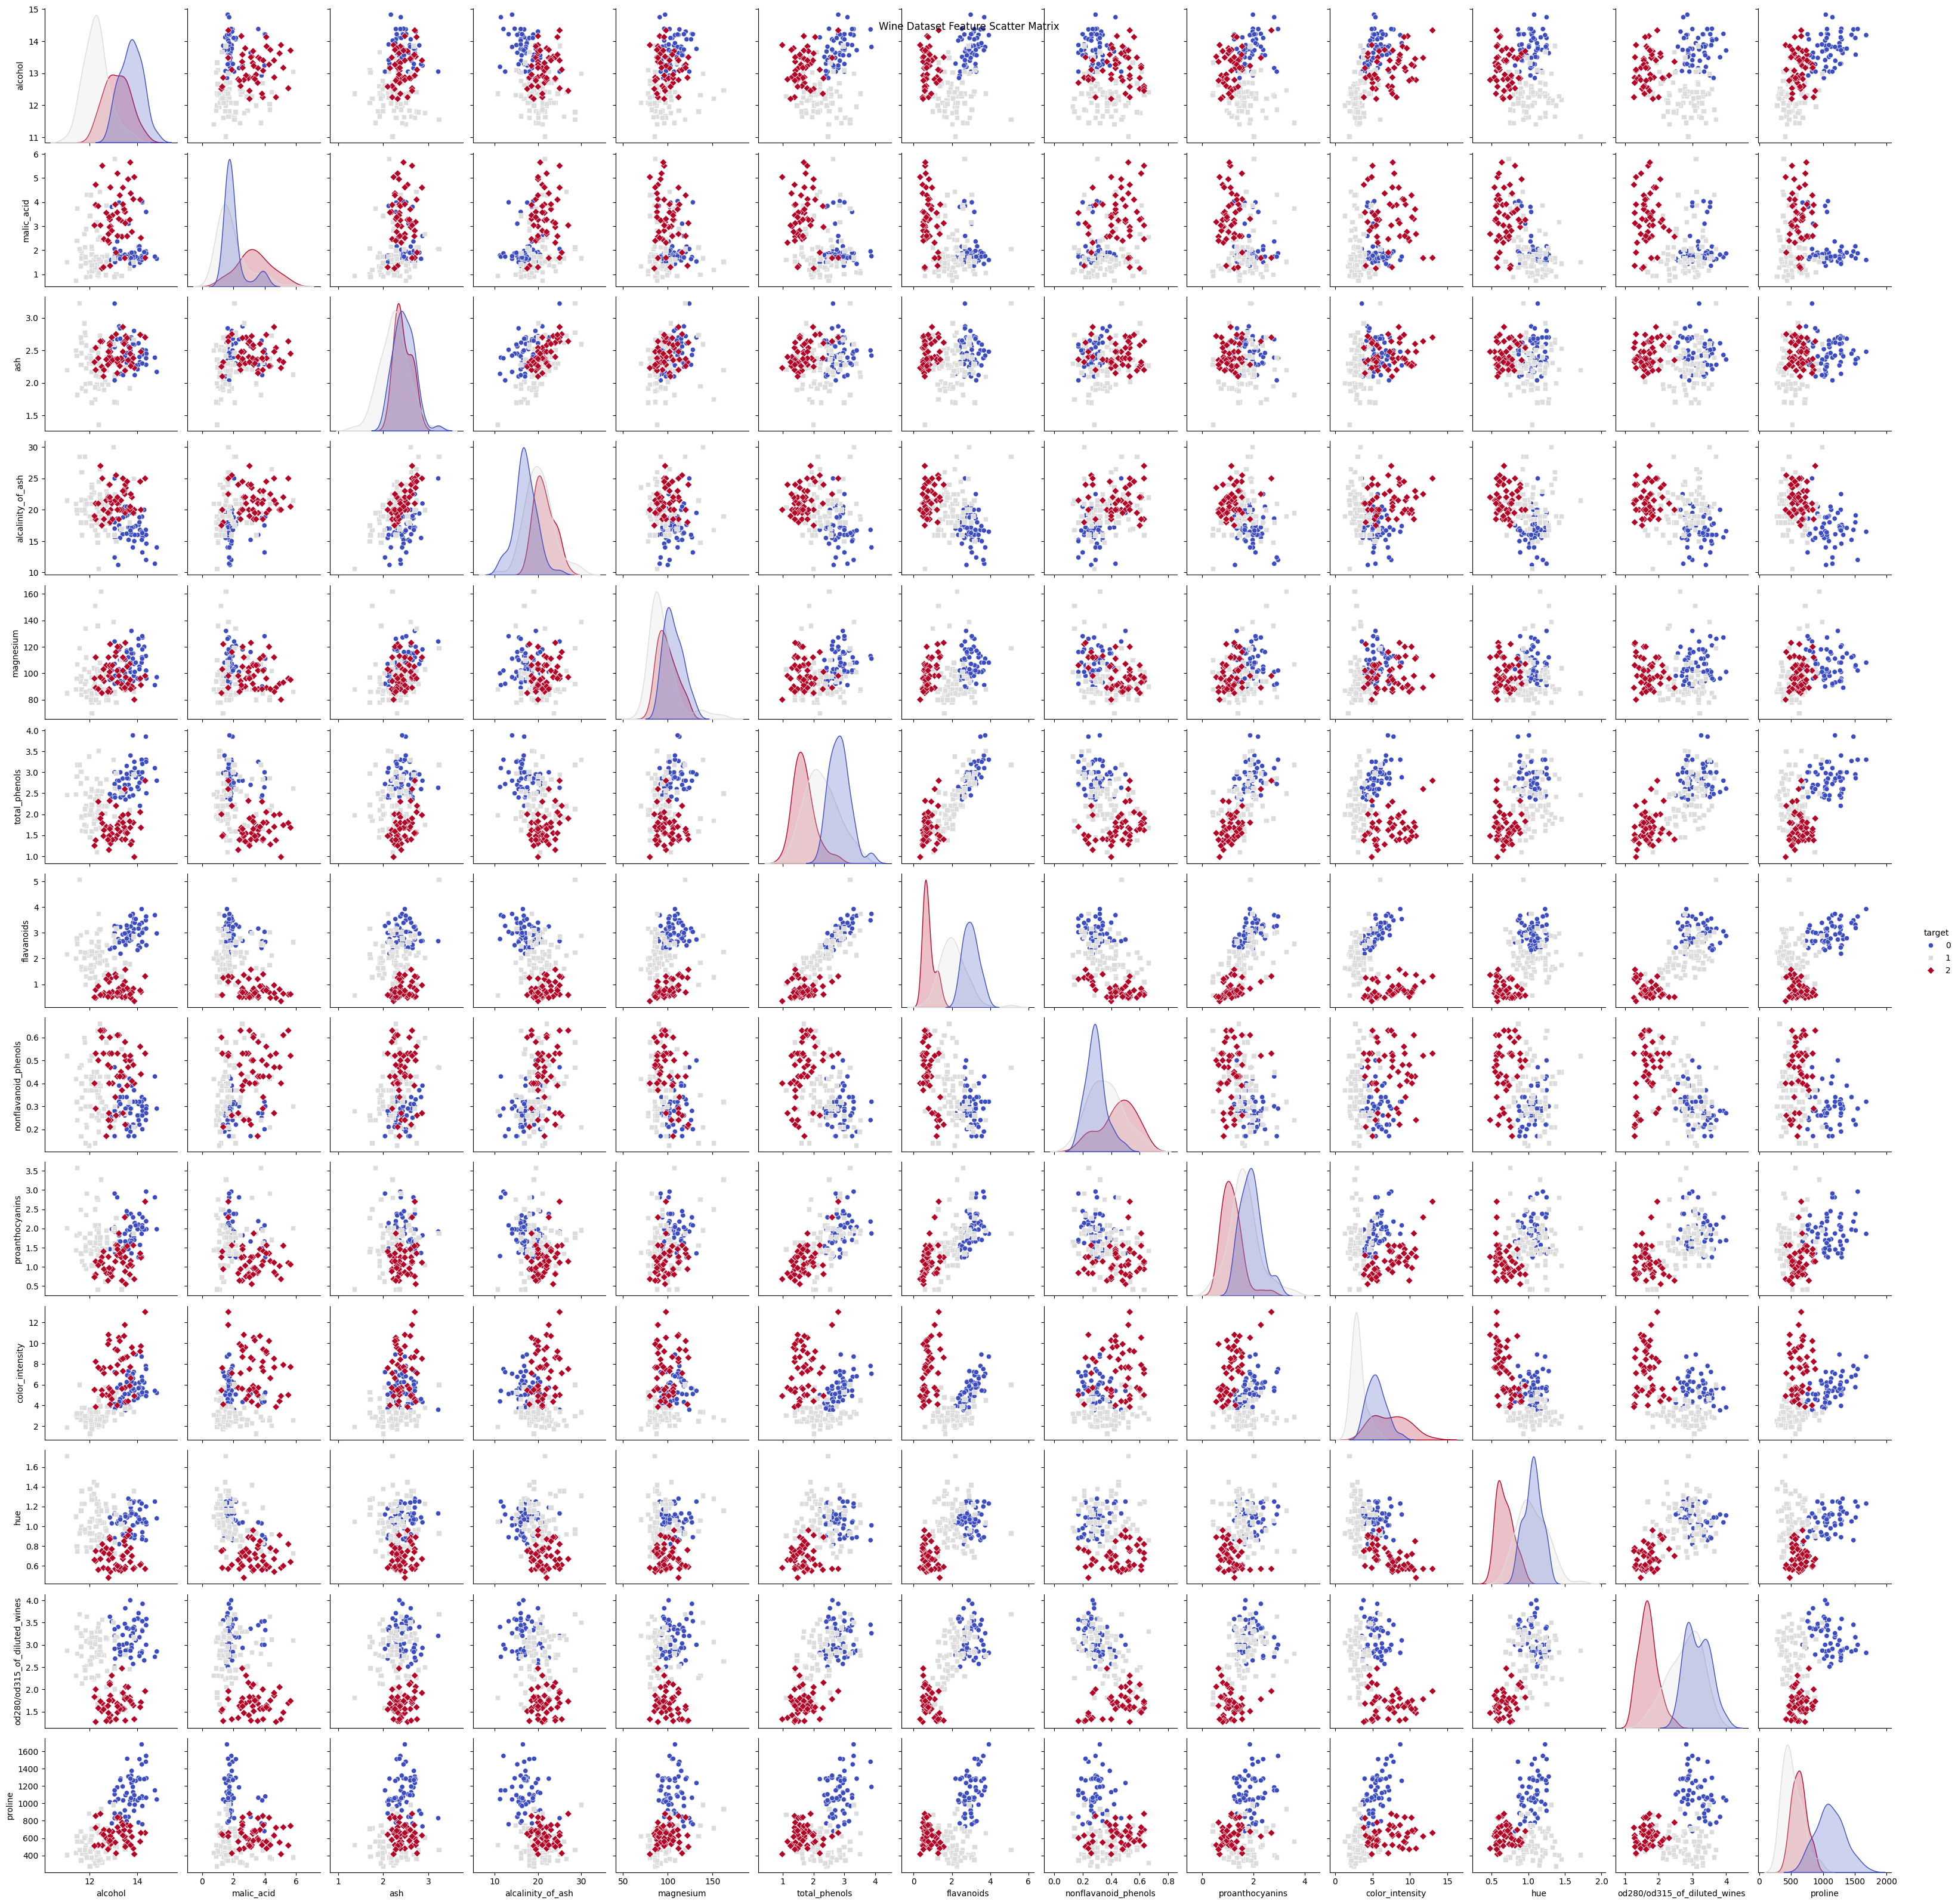

In [15]:
# Visualise pairwise relationships in the Wine dataset
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(wine_df, hue='target', palette='coolwarm', markers=["o", "s", "D"])
plt.suptitle("Wine Dataset Feature Scatter Matrix")
plt.show()

-   Choose two features for training and visualisation (e.g., alcohol and malic acid).

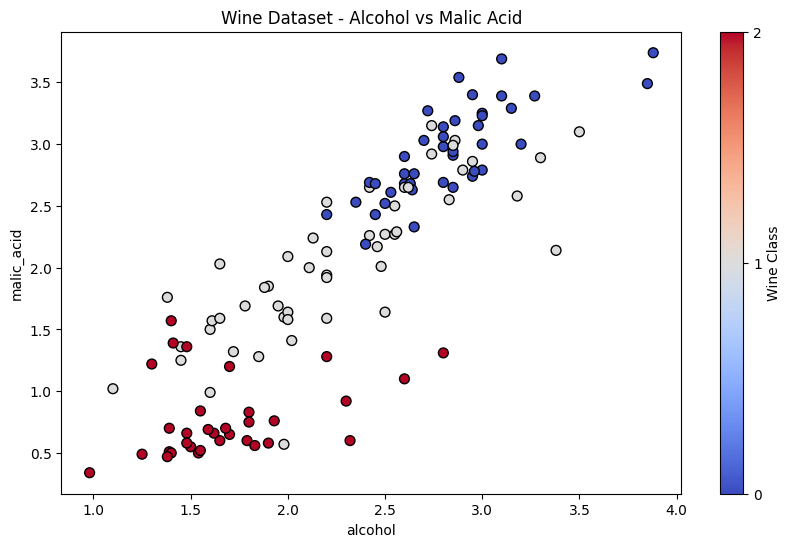

In [16]:
# Select two features for visualisation
X_wine_2d = X_wine[:, [5, 6]]  # total_phenols and flavanoids
X_train_wine_2d, X_test_wine_2d, y_train_wine, y_test_wine = train_test_split(
    X_wine_2d, y_wine, test_size=0.3, random_state=42, stratify=y_wine)
# Visualise the selected features
plt.figure(figsize=(10, 6))
plt.scatter(X_train_wine_2d[:, 0], X_train_wine_2d[:, 1], c=y_train_wine, edgecolor='k', s=50, cmap=plt.cm.coolwarm)
plt.title("Wine Dataset - Alcohol vs Malic Acid")
plt.xlabel(wine.feature_names[0])
plt.ylabel(wine.feature_names[1])
plt.colorbar(ticks=[0, 1, 2], label='Wine Class')
plt.show()

-   Build a pipeline with standardisation + k-NN vs. a depth-limited decision tree for the chosen features.

k-NN (Wine) accuracy: 0.7777777777777778
Decision Tree (Wine) accuracy: 0.8333333333333334


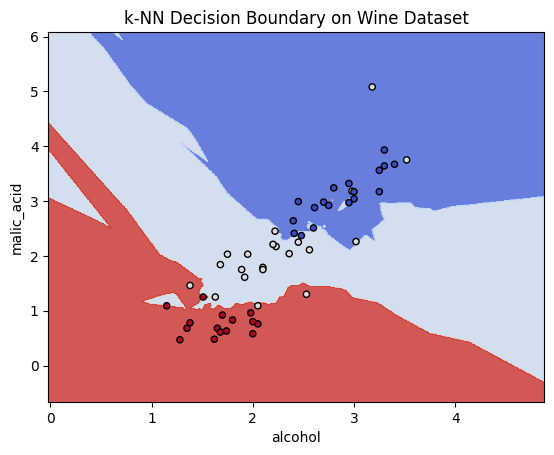

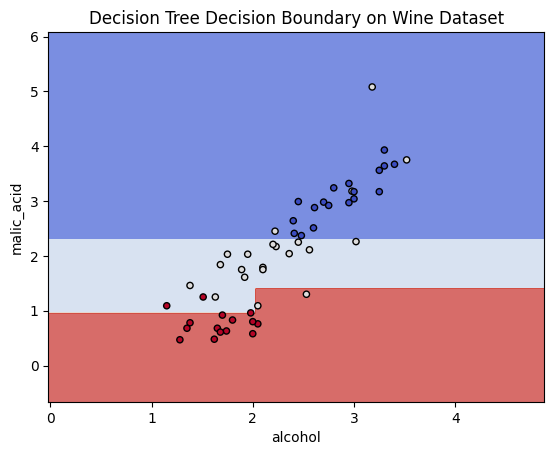

In [17]:
# k-NN pipeline for Wine dataset
knn_pipeline_wine = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])
knn_pipeline_wine.fit(X_train_wine_2d, y_train_wine)
print("k-NN (Wine) accuracy:", accuracy_score(y_test_wine,
                                              knn_pipeline_wine.predict(X_test_wine_2d)))

# Decision Tree pipeline for Wine dataset
dt_pipeline_wine = Pipeline([
    ('scaler', StandardScaler()),  # Not strictly necessary for DT
    ('dt', DecisionTreeClassifier(max_depth=3, random_state=42))
])
dt_pipeline_wine.fit(X_train_wine_2d, y_train_wine)
print("Decision Tree (Wine) accuracy:", accuracy_score(y_test_wine,
                                                       dt_pipeline_wine.predict(X_test_wine_2d)))

# Visualise decision boundaries for Wine dataset
display = DecisionBoundaryDisplay.from_estimator(
    knn_pipeline_wine, X_wine_2d, response_method='predict',
    cmap=plt.cm.coolwarm, alpha=0.85,
    xlabel=wine.feature_names[0], ylabel=wine.feature_names[1],
    grid_resolution=500)
plt.title("k-NN Decision Boundary on Wine Dataset")
plt.scatter(X_test_wine_2d[:, 0], X_test_wine_2d[:, 1], c=y_test_wine, edgecolor='k', s=20,
            cmap=plt.cm.coolwarm)
plt.show()

display = DecisionBoundaryDisplay.from_estimator(
    dt_pipeline_wine, X_wine_2d, response_method='predict',
    cmap=plt.cm.coolwarm, alpha=0.75,
    xlabel=wine.feature_names[0], ylabel=wine.feature_names[1],
    grid_resolution=500)
plt.title("Decision Tree Decision Boundary on Wine Dataset")
plt.scatter(X_test_wine_2d[:, 0], X_test_wine_2d[:, 1], c=y_test_wine, edgecolor='k', s=20,
            cmap=plt.cm.coolwarm)

plt.show()  

-   Compare performance using 5-fold cross-validation.

k-NN Cross-validation scores: [0.61111111 0.80555556 0.61111111 0.88571429 0.8       ]
Decision Tree Cross-validation scores: [0.63888889 0.86111111 0.72222222 0.91428571 0.77142857]


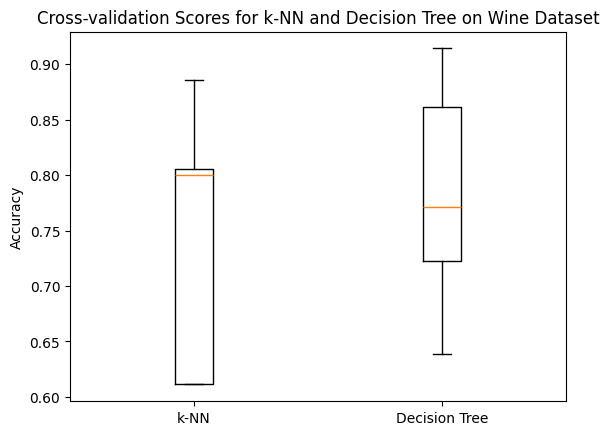

k-NN accuracy (mean ± std): 0.74 ± 0.11
Decision Tree accuracy (mean ± std): 0.78 ± 0.10


In [18]:
# Cross-validation
from sklearn.model_selection import cross_val_score
knn_scores = cross_val_score(knn_pipeline_wine, X_wine_2d, y_wine, cv=5)
dt_scores = cross_val_score(dt_pipeline_wine, X_wine_2d, y_wine, cv=5)
print("k-NN Cross-validation scores:", knn_scores)
print("Decision Tree Cross-validation scores:", dt_scores)
plt.boxplot([knn_scores, dt_scores], tick_labels=['k-NN', 'Decision Tree'])
plt.title("Cross-validation Scores for k-NN and Decision Tree on Wine Dataset")
plt.ylabel("Accuracy")
plt.show()

print(f"k-NN accuracy (mean ± std): {knn_scores.mean():.2f} ± {knn_scores.std():.2f}")
print(f"Decision Tree accuracy (mean ± std): {dt_scores.mean():.2f} ± {dt_scores.std():.2f}")